# Adventures Works Cycle - Profit drop analysis

### 1 - Loading dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
file_name = "adventure_works_purchase_orders.tar.gz"

df = pd.read_csv(file_name, compression="gzip", header=0, sep=",")

### 2 - Exploring dataset

In [4]:
df.head()

,adventure_works_purchase_orders.csv,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.0944,3374.99,0.0,1,51.3415
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.1544,3399.99,0.0,1,51.3415
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.1544,3399.99,0.0,1,51.3415


Order_ID, first column, coming with wrong name. DueData and ShipDate are missing (wrong data)

In [5]:
df.shape

(41884, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41884 entries, 0 to 41883
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   adventure_works_purchase_orders.csv  41884 non-null  object 
 1   OrderDate                            41884 non-null  object 
 2   DueDate                              41884 non-null  object 
 3   ShipDate                             41884 non-null  object 
 4   Sales_Person                         41884 non-null  object 
 5   Sales_Region                         41884 non-null  object 
 6   Sales_Province                       41884 non-null  object 
 7   Sales_City                           41884 non-null  object 
 8   Sales_Postal_Code                    41884 non-null  int64  
 9   Customer_Code                        41884 non-null  object 
 10  Customer_Name                        41884 non-null  object 
 11  Customer_Region             

No null values

In [7]:
df["OrderDate"].unique()

array(['7/1/05', '8/1/05', '9/1/05', '10/1/05', '11/1/05', '12/1/05',
       '1/1/06', '2/1/06', '3/1/06', '4/1/06', '5/1/06', '6/1/06',
       '7/1/06', '8/1/06', '9/1/06', '10/1/06', '11/1/06', '12/1/06',
       '1/1/07', '2/1/07', '3/1/07', '4/1/07', '5/1/07', '6/1/07',
       '7/1/07', '8/1/07', '9/1/07', '10/1/07', '11/1/07', '12/1/07',
       '1/1/08', '2/1/08', '3/1/08', '3/31/08', '4/1/08', '5/1/08',
       '6/1/08'], dtype=object)

In [8]:
df[df["OrderDate"] == "3/31/08"]

,adventure_works_purchase_orders.csv,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
37045,SO67202,3/31/08,00:00.0,00:00.0,Rachel Valdez,Germany,Hamburg,Berlin,14111,AW00029745,Versatile Sporting Goods Company,Germany,Nordrhein-Westfalen,Braunschweig,38001,95166,Components,Road Frames,"LL Road Frame - Red, 48",FR-R38R-48,187.1571,337.22,0.0,1,6.2386


In [9]:
df[df["Sales_Region"] == "Germany"]

,adventure_works_purchase_orders.csv,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
37045,SO67202,3/31/08,00:00.0,00:00.0,Rachel Valdez,Germany,Hamburg,Berlin,14111,AW00029745,Versatile Sporting Goods Company,Germany,Nordrhein-Westfalen,Braunschweig,38001,95166,Components,Road Frames,"LL Road Frame - Red, 48",FR-R38R-48,187.1571,337.22,0.0,1,6.2386


In [10]:
df = df[df["Sales_Region"] != 'Germany']

Removed weird date from Germany (was also the only record for Germany)

In [11]:
df = df.rename(columns={'adventure_works_purchase_orders.csv': 'Order_ID'})

df["OrderMonth"] = pd.to_datetime(df["OrderDate"])

df["Revenue"] = df["UnitPrice"] * df["OrderQty"]

df["Cost"] = df["Unit_Cost"] * df["OrderQty"]

df["UnitProfit"] = df["UnitPrice"] - df["Unit_Cost"]
df["Profit"] = df["UnitProfit"] * df["OrderQty"]

df["UnitDiscount"] = df["UnitProfit"] * df["UnitPriceDiscount"]
df["Discount"] = df["UnitDiscount"] * df["OrderQty"]

df["UnitNetProfit"] = df["UnitProfit"] * (1 - df["UnitPriceDiscount"])
df["NetProfit"] = df["UnitNetProfit"] * df["OrderQty"]

df["FreightCost"] = df["Unit_Freight_Cost"] * df["OrderQty"]

Created supporting columns.

For the rest of the analysis will be assumed each customer pays for their freight. Also that the dates represent the month when the order was placed, instead of assuming all orders are received on every first day of the month.

### 3 - Analysis

In [12]:
df_monthly = df.groupby("OrderMonth").agg({"NetProfit": "sum",
                                           "Revenue": "sum",
                                           "Cost": "sum",
                                           "Order_ID": "nunique",
                                           "OrderQty": "sum",
                                           "Discount": "sum",
                                           "Customer_Code": "nunique",
                                           "Sales_Person": "nunique"}).reset_index()

df_monthly["AvgOrderPerCustomer"] = df_monthly["Order_ID"] / df_monthly["Customer_Code"]

df_monthly["AvgItemsPerOrder"] = df_monthly["OrderQty"] / df_monthly["Order_ID"]

df_monthly["AvgOrderValue"] = df_monthly["Revenue"] / df_monthly["Order_ID"]

df_monthly.head()

,OrderMonth,NetProfit,Revenue,Cost,Order_ID,OrderQty,Discount,Customer_Code,Sales_Person,AvgOrderPerCustomer,AvgItemsPerOrder,AvgOrderValue
0,2005-07-01,2.657533e+05,638871.55,3.731182e+05,31,594,0.000000,31,7,1.0,19.161290,20608.759677
1,2005-08-01,8.849176e+05,2080426.54,1.194329e+06,54,1566,1179.945873,54,8,1.0,29.000000,38526.417407
2,2005-09-01,6.931054e+05,1634332.22,9.408952e+05,48,1236,331.631102,48,7,1.0,25.750000,34048.587917
3,2005-10-01,4.313825e+05,1041963.91,6.105701e+05,33,875,11.291845,33,7,1.0,26.515152,31574.663939
4,2005-11-01,1.389994e+06,3302632.62,1.911949e+06,67,2352,689.634144,67,8,1.0,35.104478,49293.024179


Created dataframe with monthly level metrics

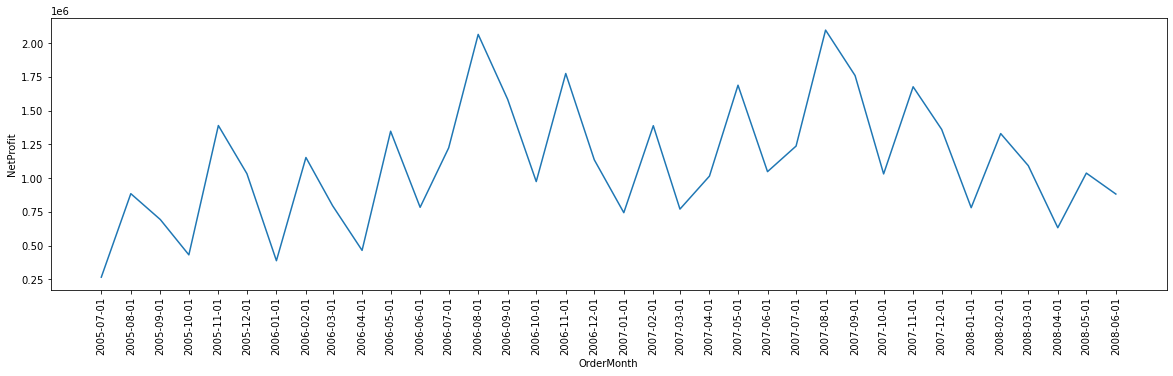

In [13]:
plt.figure(figsize=(20,5))
           
ax = sns.lineplot(x="OrderMonth", 
                  y="NetProfit", 
                  data=df_monthly)

ax.set(xticks=df_monthly["OrderMonth"].unique())

ax.set_ylabel("NetProfit")    
ax.set_xlabel("OrderMonth")

plt.xticks(rotation=90)

plt.show()

It's possible to see the drop in NetProfit from September 2007 onwards.

NetProfit = Orders Revenue - Items Cost - Discount

In [14]:
df_monthly_region = df.groupby(["OrderMonth", "Sales_Region"]).agg({"NetProfit": "sum",
                                                                    "Revenue": "sum",
                                                                    "Cost": "sum",
                                                                    "Order_ID": "nunique",
                                                                    "OrderQty": "sum",
                                                                    "Discount": "sum",
                                                                    "Customer_Code": "nunique",
                                                                    "Sales_Person": "nunique"}).reset_index()

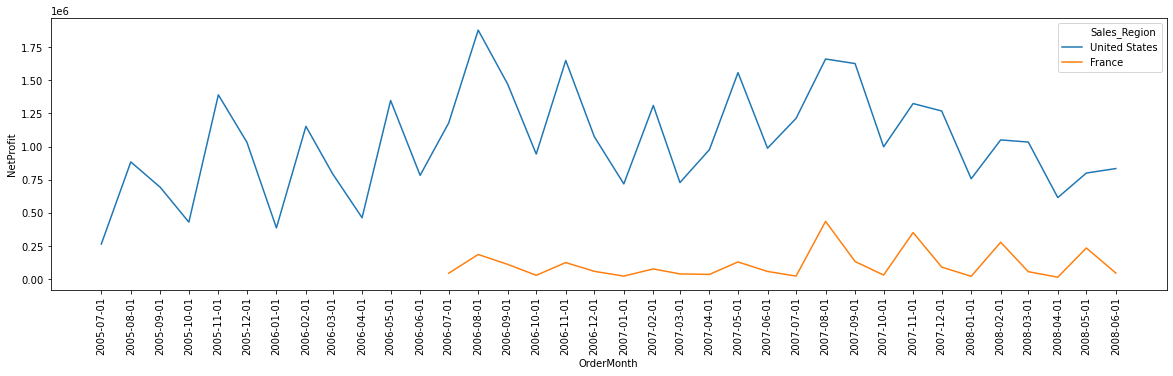

In [15]:
plt.figure(figsize=(20,5))
           
ax2 = sns.lineplot(x="OrderMonth", 
                  y="NetProfit", 
                  hue="Sales_Region",
                  data=df_monthly_region)

ax2.set(xticks=df_monthly_region["OrderMonth"].unique())

ax2.set_ylabel("NetProfit")    
ax2.set_xlabel("OrderMonth")

plt.xticks(rotation=90)

plt.show()

France is also showing a drop in NetProfit. Countries will be analysed together.

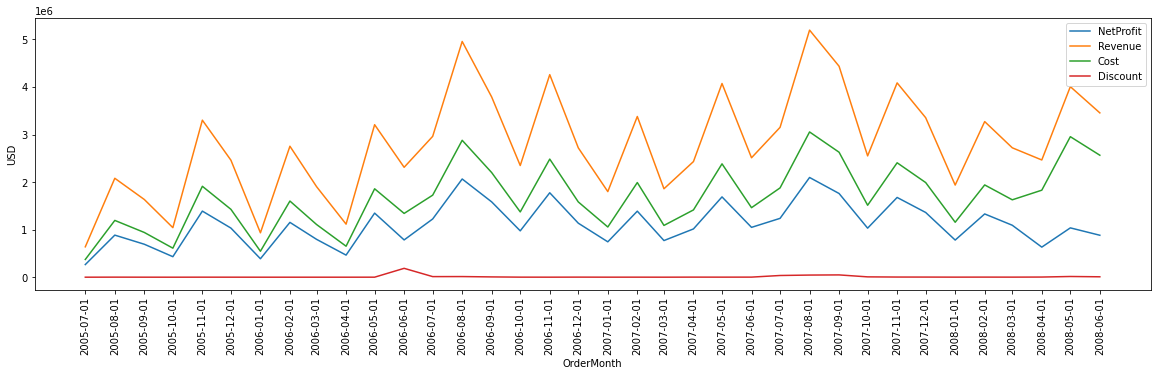

In [16]:
plt.figure(figsize=(20,5))
           
ax = sns.lineplot(x="OrderMonth", 
                  y="NetProfit", 
                  data=df_monthly,
                  label="NetProfit")

ax3 = sns.lineplot(x="OrderMonth", 
                   y="Revenue", 
                   data=df_monthly,
                   label="Revenue")

ax4 = sns.lineplot(x="OrderMonth", 
                   y="Cost", 
                   data=df_monthly,
                   label="Cost")

ax5 = sns.lineplot(x="OrderMonth", 
                   y="Discount", 
                   data=df_monthly,
                   label="Discount")

ax.set(xticks=df_monthly["OrderMonth"].unique())

ax.set_ylabel('USD')    
ax.set_xlabel('OrderMonth')

plt.xticks(rotation=90)

plt.legend()

plt.show()

Expected behaviour from 2007-08-01 to 2008-04-01: drop in Revenue, drop in NetProfit.

Not expected behaviour from 2008-04-01 onwards: increase in Revenue, drop in Profit. Cost has its peak with a not so great Revenue.

### 3.1 Explaining the expected behaviour

Expected behaviour from 2007-08-01 to 2008-04-01: drop in Revenue, drop in NetProfit.

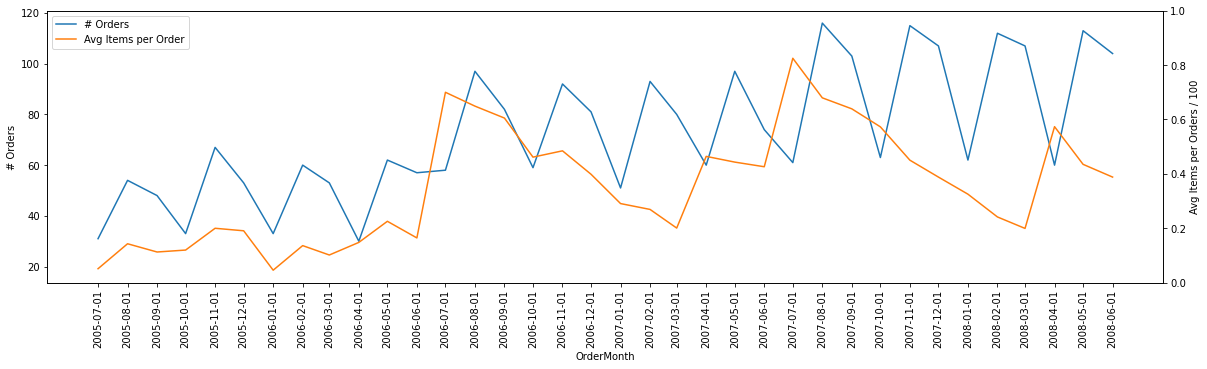

In [17]:
plt.figure(figsize=(20,5))

ax6 = sns.lineplot(x="OrderMonth", 
                   y="Order_ID", 
                   data=df_monthly,
                   label="# Orders")

ax7 = sns.lineplot(x="OrderMonth", 
                   y="AvgItemsPerOrder", 
                   data=df_monthly,
                   label="Avg Items per Order")

ax6.set(xticks=df_monthly["OrderMonth"].unique())   

plt.xticks(rotation=90)

ax7 = ax6.twinx()

ax6.set_ylabel("# Orders")    
ax6.set_xlabel("OrderMonth")

ax7.set_ylabel("Avg Items per Orders / 100") 

plt.show()

Number of orders remains "flat" while the avergare number of items per order is droping.

It's also possible to note an interesting sazonality of orders coming in every 3 to 4 months. A cohort analysis can help better understand such pattern.

In [18]:
df_customer_first_order = df.groupby("Customer_Code").agg({"OrderMonth": "min"}).reset_index()

df_customer_first_order = df_customer_first_order.rename(columns={"OrderMonth": "MinOrderMonth"})

df_customer_first_order.head()

,Customer_Code,MinOrderMonth
0,AW00029484,2005-09-01
1,AW00029485,2007-09-01
2,AW00029486,2005-09-01
3,AW00029487,2005-09-01
4,AW00029489,2005-07-01


In [19]:
df_fo = pd.merge(df,
                 df_customer_first_order,
                 on="Customer_Code")

df_fo.head()

,Order_ID,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,OrderMonth,Revenue,Cost,UnitProfit,Profit,UnitDiscount,Discount,UnitNetProfit,NetProfit,FreightCost,MinOrderMonth
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415,2005-07-01,3374.99,1898.0944,1476.8956,1476.8956,0.0,0.0,1476.8956,1476.8956,51.3415,2005-07-01
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415,2005-07-01,10124.97,5694.2832,1476.8956,4430.6868,0.0,0.0,1476.8956,4430.6868,154.0245,2005-07-01
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.0944,3374.99,0.0,1,51.3415,2005-07-01,3374.99,1898.0944,1476.8956,1476.8956,0.0,0.0,1476.8956,1476.8956,51.3415,2005-07-01
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.1544,3399.99,0.0,1,51.3415,2005-07-01,3399.99,1912.1544,1487.8356,1487.8356,0.0,0.0,1487.8356,1487.8356,51.3415,2005-07-01
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.1544,3399.99,0.0,1,51.3415,2005-07-01,3399.99,1912.1544,1487.8356,1487.8356,0.0,0.0,1487.8356,1487.8356,51.3415,2005-07-01


In [20]:
df_cohort = df_fo.groupby(["OrderMonth", "MinOrderMonth"]).agg({"Revenue": "sum"})

df_cohort = df_cohort.sort_values(by=["MinOrderMonth", "OrderMonth"])

df_cohort = df_cohort.unstack(level=0)

df_cohort.head()

Revenue                                                  \
OrderMonth    2005-07-01  2005-08-01  2005-09-01  2005-10-01  2005-11-01   
MinOrderMonth                                                              
2005-07-01     638871.55         NaN         NaN  1028966.57         NaN   
2005-08-01           NaN  2080426.54         NaN         NaN  3258835.73   
2005-09-01           NaN         NaN  1634332.22         NaN         NaN   
2005-10-01           NaN         NaN         NaN    12997.34         NaN   
2005-11-01           NaN         NaN         NaN         NaN    43796.89   

                                                                          \
OrderMonth     2005-12-01 2006-01-01  2006-02-01  2006-03-01  2006-04-01   
MinOrderMonth                                                              
2005-07-01            NaN  925236.94         NaN         NaN  1106281.47   
2005-08-01            NaN        NaN  2710977.36         NaN         NaN   
2005-09-01     2408983.61        NaN         NaN  1849771.91         NaN   
2005-10-01            NaN    6830.93         NaN         NaN     9854.90   
2005-11-01            NaN        NaN    43492.53         NaN         NaN   

                                                                            \
OrderMonth     2006-05-01  2006-06-01  2006-07-01   2006-08-01  2006-09-01   
MinOrderMonth                                                                
2005-07-01            NaN         NaN  1172996.96          NaN         NaN   
2005-08-01     3170978.34         NaN         NaN  1995198.070         NaN   
2005-09-01            NaN  2240910.44         NaN          NaN  1276312.52   
2005-10-01            NaN         NaN    80525.52          NaN         NaN   
2005-11-01       36427.17         NaN         NaN    43935.935         NaN   

                                                                            \
OrderMonth     2006-10-01  2006-11-01  2006-12-01  2007-01-01   2007-02-01   
MinOrderMonth                                                                
2005-07-01     967334.040         NaN         NaN  783427.005          NaN   
2005-08-01            NaN  1755994.71         NaN         NaN  1430008.395   
2005-09-01            NaN         NaN  1005145.15         NaN          NaN   
2005-10-01      59941.085         NaN         NaN   44053.420          NaN   
2005-11-01            NaN    20637.23         NaN         NaN    34208.590   

                                                                        \
OrderMonth    2007-03-01 2007-04-01  2007-05-01  2007-06-01 2007-07-01   
MinOrderMonth                                                            
2005-07-01           NaN  947969.69         NaN         NaN  907051.91   
2005-08-01           NaN        NaN  1676282.06         NaN        NaN   
2005-09-01     751753.51        NaN         NaN  943675.315        NaN   
2005-10-01           NaN   77863.47         NaN         NaN    8022.27   
2005-11-01           NaN        NaN    22745.98         NaN        NaN   

                                                                        \
OrderMonth     2007-08-01 2007-09-01 2007-10-01  2007-11-01 2007-12-01   
MinOrderMonth                                                            
2005-07-01            NaN        NaN  769517.62         NaN        NaN   
2005-08-01     1385398.91        NaN        NaN  1146667.77        NaN   
2005-09-01            NaN  909821.62        NaN         NaN  656085.52   
2005-10-01            NaN        NaN    5843.56         NaN        NaN   
2005-11-01       27621.73        NaN        NaN    23005.36        NaN   

                                                                       \
OrderMonth    2008-01-01 2008-02-01 2008-03-01 2008-04-01  2008-05-01   
MinOrderMonth                                                           
2005-07-01     594044.43        NaN        NaN  809604.09         NaN   
2005-08-01           NaN  966016.28        NaN        NaN  1156685.63  

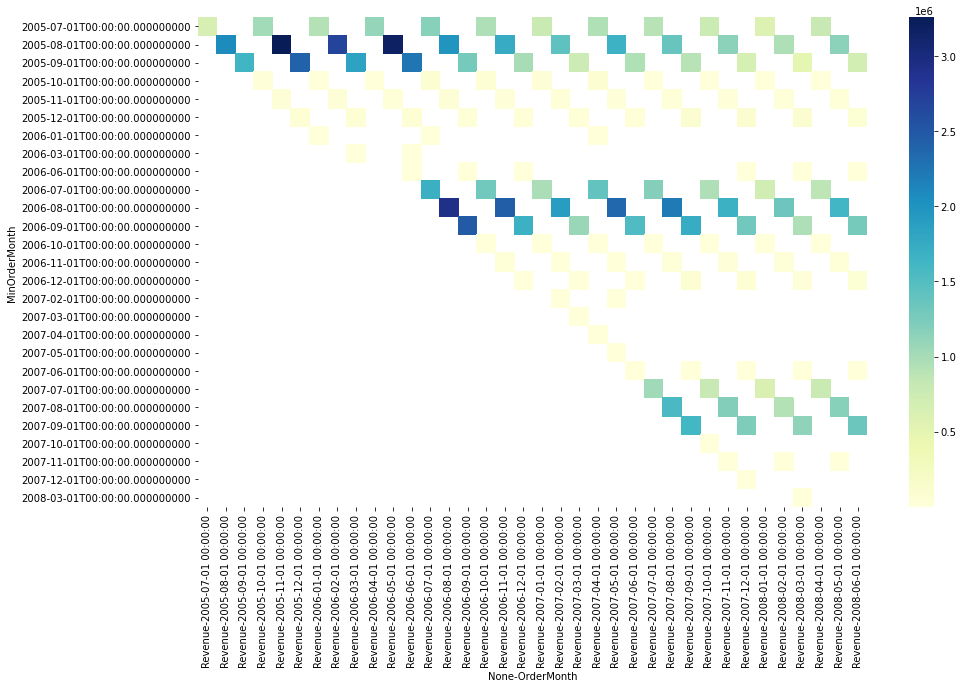

In [21]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(df_cohort, cmap="YlGnBu")
plt.show()

The drop in NetProfit can be explained by the vendors from the cohorts of February, March, April and May 2007. Although they were relative weak cohorts, if that vendors had placed regular orders such as in other cohorts, the profit could be sustained as new vendor from following cohorts would be kicking in.

A follow up analysis could be done in those 3 groups of stronger cohorts in terms of revenue to understand how they differentiate from the others. From the chart is possible to see that a cohort that starts strong tend to be strong during the upcoming months as well.

### 3.2 Explaining the UNexpected behaviour

Not expected behaviour from 2008-04-01 onwards: increase in Revenue, drop in Profit. Cost has its peak with a not so great Revenue.

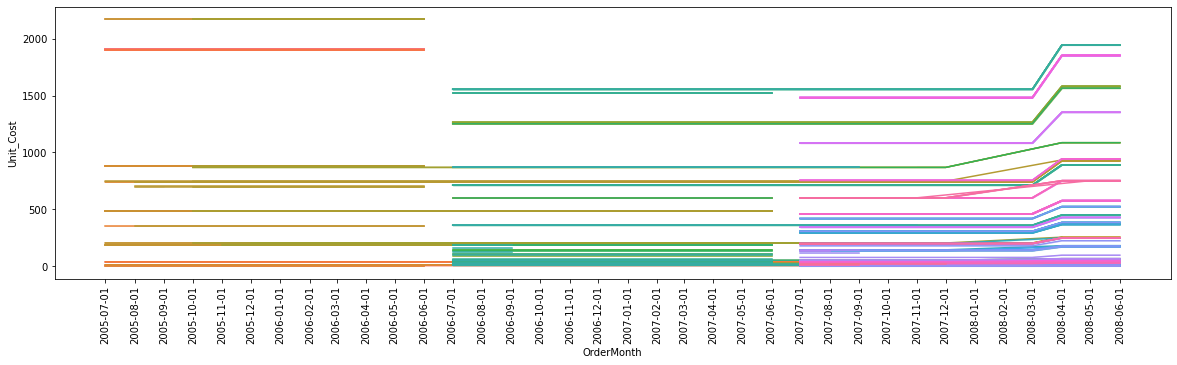

In [22]:
plt.figure(figsize=(20,5))
           
ax = sns.lineplot(x="OrderMonth", 
                  y="Unit_Cost", 
                  hue="Product_Code",
                  data=df, 
                  legend=False)

ax.set(xticks=df["OrderMonth"].unique())

plt.xticks(rotation=90)

plt.show()

Most of the items had their cost readjusted in May 2008. Costs increased.

Each line represents a product.

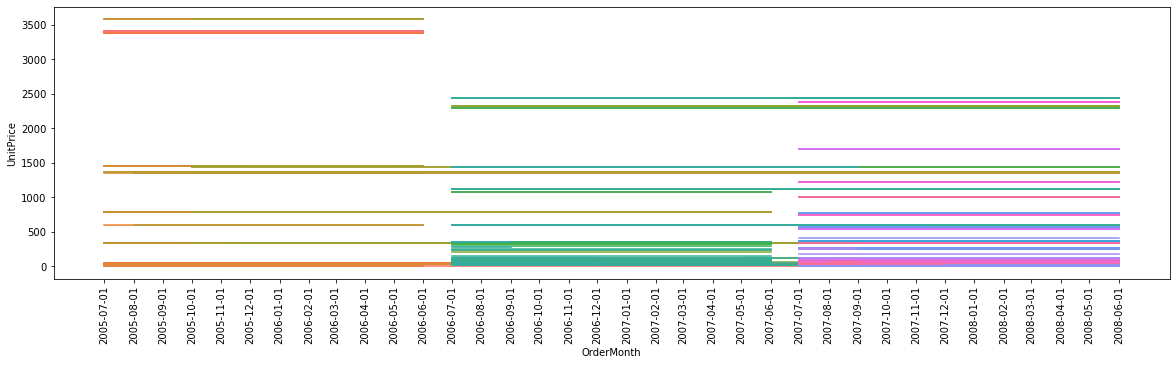

In [23]:
plt.figure(figsize=(20,5))
           
ax = sns.lineplot(x="OrderMonth", 
                  y="UnitPrice", 
                  hue="Product_Code",
                  data=df,
                  legend=False)

ax.set(xticks=df["OrderMonth"].unique())

plt.xticks(rotation=90)

plt.show()

However, the selling prices for the customers remained the same.

This combination explains why after May 2008 even with the Revenue picking up again the NetProfit is still dropping. In this new scenario much more Revenue is need to achieve the same NetProfit.

Each line represents a product.

Interesting to see the new line of products each year.

### 4 - Recommendation

- Contact customers from Feb, Mar, Apr and May 2007 cohorts and try to recover them or at least understand their churn reason(s).


- Prices to the customers have never been increased, after the increase in items costs it's time to work on a price increase strategy in order to sustain the profit.